In [21]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import joblib
from matplotlib.colors import ListedColormap

In [22]:
class Perceptron:


  def __init__(self, eta: float=None, epochs: int=None):
    self.weights = np.random.randn(3) * 1e-4 #small random weights
    training = (eta is not None) and (epochs is not None)
    if training:
      print(f"initial weights before training: \n{self.weights}")
    self.eta = eta
    self.epochs = epochs


  
  #undercore means an internal method or hidden method(can be accessed inside the class only)
  def _z_outcome(self, inputs, weights):
    return np.dot(inputs, weights)


  def activation_function(self, z):
    return np.where(z > 0, 1, 0)

  def fit(self, X, y):
    self.X = X
    self.y = y
    X_with_bias = np.c_[self.X, -np.ones((len(self.X), 1))]
    print(f"X with bias: \n{X_with_bias}")

    for epoch in range(self.epochs):
      print("_ _"*10)
      print(f"for epoch: \n{epoch}")
      print("_ _"*10)


      z = self._z_outcome(X_with_bias, self.weights)
      y_hat = self.activation_function(z)
      print(f"Predicted value after forward pass: \n{y_hat}")

      self.error = self.y - y_hat
      print(f"error: \n{self.error}")

      self.weights = self.weights + self.eta * np.dot(X_with_bias.T, self.error)
      print(f"updated weights after epoch: \n{epoch + 1}/{self.epochs}: \n{self.weights}")
      print("##"*10)

  def predict(self, X):
    X_with_bias = np.c_[X, -np.ones((len(X), 1))]
    z = self._z_outcome(X_with_bias, self.weights)
    return self.activation_function(z)

  def total_loss(self):
    total_loss = np.sum(self.error)
    print(f"\n total_loss: {total_loss}\n")
    return total_loss

  def _create_dir_return_path(self, model_dir, filename):
    os.makedirs(model_dir, exist_ok= True)
    return os.path.join(model_dir, filename)
  
  def save(self, filename, model_dir=None):
    if model_dir is not None:
      model_file_path = self._create_dir_return_path(model_dir, filename)
      joblib.dump(self, model_file_path)
    else: 
      model_file_path = self._create_dir_return_path("model", filename)
      joblib.dump(self, model_file_path)
  
  def load(self, filepath):
    return joblib.load(filepath)

  

  
  

In [23]:
def prepare_data(df, target_col="y"):
  X = df.drop(target_col, axis=1)
  y = df[target_col]

  return X, y

In [24]:
AND = {
    "x1":[0,0,1,1],
    "x2":[0,1,0,1],
    "y": [0,0,0,1]
}

df_AND = pd.DataFrame(AND)

df_AND

,x1,x2,y
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


In [25]:
X, y = prepare_data(df_AND)
ETA = 0.1
EPOCHS = 10

model_AND = Perceptron(eta=ETA, epochs=EPOCHS)
model_AND.fit(X, y)

_= model_AND.total_loss()

initial weights before training: 
[1.91122807e-05 1.07524165e-04 1.91447536e-04]
X with bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
_ __ __ __ __ __ __ __ __ __ _
for epoch: 
0
_ __ __ __ __ __ __ __ __ __ _
Predicted value after forward pass: 
[0 0 0 0]
error: 
0    0
1    0
2    0
3    1
Name: y, dtype: int64
updated weights after epoch: 
1/10: 
[ 0.10001911  0.10010752 -0.09980855]
####################
_ __ __ __ __ __ __ __ __ __ _
for epoch: 
1
_ __ __ __ __ __ __ __ __ __ _
Predicted value after forward pass: 
[1 1 1 1]
error: 
0   -1
1   -1
2   -1
3    0
Name: y, dtype: int64
updated weights after epoch: 
2/10: 
[1.91122807e-05 1.07524165e-04 2.00191448e-01]
####################
_ __ __ __ __ __ __ __ __ __ _
for epoch: 
2
_ __ __ __ __ __ __ __ __ __ _
Predicted value after forward pass: 
[0 0 0 0]
error: 
0    0
1    0
2    0
3    1
Name: y, dtype: int64
updated weights after epoch: 
3/10: 
[0.10001911 0.10010752 0.10019145]
####################
_ __ __

In [26]:
model_AND.save(filename = "and.pkl")

In [27]:
reload_AND = Perceptron().load("model/and.pkl")

In [28]:
reload_AND.predict(X = [[1,1]])

array([1])

In [29]:
OR = {
    "x1": [0,0,1,1],
    "x2": [0,1,0,1],
    "y" : [0,1,1,1]
}

df_OR = pd.DataFrame(OR)
df_OR

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,1


In [30]:
X, y = prepare_data(df_OR)
ETA = 0.1
EPOCHS = 10

model_OR = Perceptron(eta = ETA, epochs = EPOCHS)
model_OR.fit(X, y)
_= model_OR.total_loss()

initial weights before training: 
[-6.78958012e-05 -9.68987996e-05  1.97553134e-04]
X with bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
_ __ __ __ __ __ __ __ __ __ _
for epoch: 
0
_ __ __ __ __ __ __ __ __ __ _
Predicted value after forward pass: 
[0 0 0 0]
error: 
0    0
1    1
2    1
3    1
Name: y, dtype: int64
updated weights after epoch: 
1/10: 
[ 0.1999321   0.1999031  -0.29980245]
####################
_ __ __ __ __ __ __ __ __ __ _
for epoch: 
1
_ __ __ __ __ __ __ __ __ __ _
Predicted value after forward pass: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
updated weights after epoch: 
2/10: 
[ 0.1999321   0.1999031  -0.19980245]
####################
_ __ __ __ __ __ __ __ __ __ _
for epoch: 
2
_ __ __ __ __ __ __ __ __ __ _
Predicted value after forward pass: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
updated weights after epoch: 
3/10: 
[ 0.1999321   0.1999031  -0.09980245]
####################
_ __ __ __

In [31]:
model_OR.save(filename = "or.pkl")

In [32]:
reload_OR = Perceptron().load("model/or.pkl")

In [33]:
reload_OR.predict(X = [[0,1]])

array([1])

Note- One Perceptron is a linear classifier that's why it is unable to give correct results for XOR.

One Perceptron is applicable on linearly seperable dataset.

In [34]:
XOR = {
    "x1": [0,0,1,1],
    "x2": [0,1,0,1],
    "y" : [0,1,1,0]
}

df_XOR = pd.DataFrame(XOR)
df_XOR

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


In [35]:
X, y = prepare_data(df_XOR)
ETA = 0.1
EPOCHS = 10

model_XOR = Perceptron(eta = ETA, epochs = EPOCHS)
model_XOR.fit(X, y)

_= model_XOR.total_loss()

initial weights before training: 
[ 6.38968882e-05  8.03409928e-05 -3.54401353e-05]
X with bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
_ __ __ __ __ __ __ __ __ __ _
for epoch: 
0
_ __ __ __ __ __ __ __ __ __ _
Predicted value after forward pass: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3   -1
Name: y, dtype: int64
updated weights after epoch: 
1/10: 
[-0.0999361  -0.09991966  0.19996456]
####################
_ __ __ __ __ __ __ __ __ __ _
for epoch: 
1
_ __ __ __ __ __ __ __ __ __ _
Predicted value after forward pass: 
[0 0 0 0]
error: 
0    0
1    1
2    1
3    0
Name: y, dtype: int64
updated weights after epoch: 
2/10: 
[ 6.38968882e-05  8.03409928e-05 -3.54401353e-05]
####################
_ __ __ __ __ __ __ __ __ __ _
for epoch: 
2
_ __ __ __ __ __ __ __ __ __ _
Predicted value after forward pass: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3   -1
Name: y, dtype: int64
updated weights after epoch: 
3/10: 
[-0.0999361  -0.09991966  0.19996456]
###################

In [36]:
model_XOR.save(filename = "xor.pkl")

In [37]:
reload_XOR = Perceptron().load("model/xor.pkl")

In [38]:
reload_XOR.predict(X = [[0,0]])

array([1])

In [41]:
def save_plot(df, model, filename="plot.png", plot_dir="plots"):

  def _create_base_plot(df):
    df.plot(kind="scatter", x="x1", y="x2", c="y", s=100, cmap="coolwarm")
    plt.axhline(y=0, color="black", linestyle="--", linewidth=1)
    plt.axvline(x=0, color="black", linestyle="--", linewidth=1)

    figure= plt.gcf()
    figure.set_size_inches(10, 8)
  

  def _plot_decision_regions(X, y, classifier, resolution=0.02):
    colors = ("cyan", "lightgreen")
    cmap = ListedColormap(colors)

    X = X.values # as an array
    x1 = X[:, 0]
    x2 = X[:, 1]

    x1_min, x1_max = x1.min() - 1, x1.max() + 1 
    x2_min, x2_max = x2.min() - 1, x2.max() + 1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                            np.arange(x2_min, x2_max, resolution)
                          )
    y_hat = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    y_hat = y_hat.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, y_hat, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    plt.plot()





  X, y = prepare_data(df)

  _create_base_plot(df)
  _plot_decision_regions(X, y, model)

  os.makedirs(plot_dir, exist_ok=True)
  plot_path = os.path.join(plot_dir, filename)
  plt.savefig(plot_path)


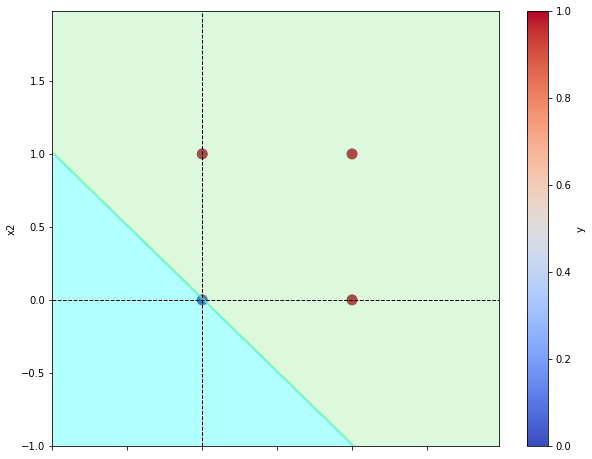

In [42]:
save_plot(df_OR, model_OR, filename="or.png")

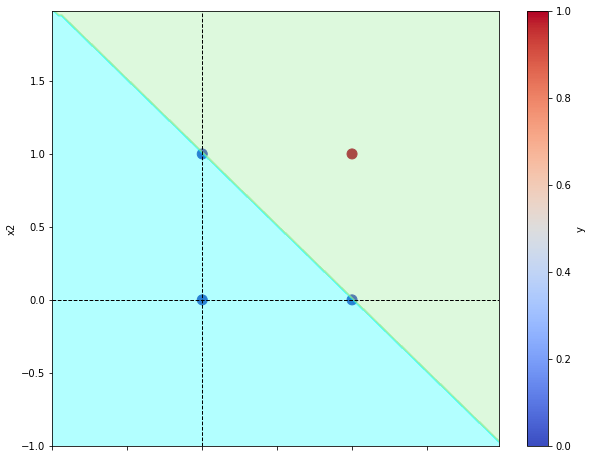

In [43]:
save_plot(df_AND, model_AND, filename="and.png")

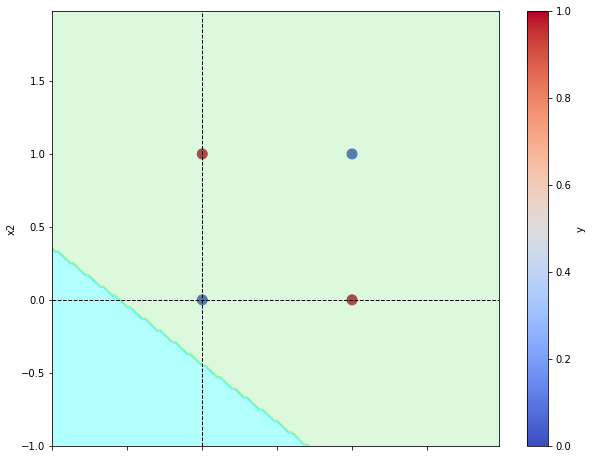

In [44]:
save_plot(df_XOR, model_XOR, filename="xor.png")